In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/wsbwsb/wsb.csv
/kaggle/input/storeee/store.xls


In [2]:
import pandas as pd
wsb = pd.read_csv("/kaggle/input/wsbwsb/wsb.csv")

In [3]:
wsb.head(10)

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

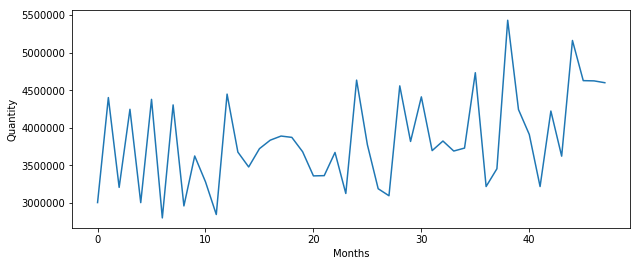

In [5]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb['Sale Quantity'] )

In [6]:
wsb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
Month                    48 non-null int64
Sale Quantity            48 non-null int64
Promotion Expenses       48 non-null int64
Competition Promotion    48 non-null int64
dtypes: int64(4)
memory usage: 1.6 KB


In [7]:
wsb['mavg_12'] = wsb['Sale Quantity'].rolling( window = 12 ).mean().shift(1)
wsb['mavg_12']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12    3.503418e+06
13    3.623828e+06
14    3.563307e+06
15    3.585963e+06
16    3.542250e+06
17    3.611596e+06
18    3.570858e+06
19    3.660275e+06
20    3.608291e+06
21    3.641629e+06
22    3.619804e+06
23    3.652408e+06
24    3.675758e+06
25    3.691297e+06
26    3.699428e+06
27    3.675258e+06
28    3.622998e+06
29    3.683271e+06
30    3.677275e+06
31    3.722237e+06
32    3.723475e+06
33    3.762177e+06
34    3.789493e+06
35    3.794351e+06
36    3.928410e+06
37    3.810280e+06
38    3.783643e+06
39    3.970688e+06
40    4.066369e+06
41    4.012413e+06
42    3.962370e+06
43    3.946629e+06
44    3.940490e+06
45    4.052117e+06
46    4.130275e+06
47    4.204882e+06
Name: mavg_12, dtype: float64

In [8]:
wsb['mavg_11'] = wsb['Sale Quantity'].rolling( window = 12 ).mean()

In [9]:
wsb['mavg_11']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11    3.503418e+06
12    3.623828e+06
13    3.563307e+06
14    3.585963e+06
15    3.542250e+06
16    3.611596e+06
17    3.570858e+06
18    3.660275e+06
19    3.608291e+06
20    3.641629e+06
21    3.619804e+06
22    3.652408e+06
23    3.675758e+06
24    3.691297e+06
25    3.699428e+06
26    3.675258e+06
27    3.622998e+06
28    3.683271e+06
29    3.677275e+06
30    3.722237e+06
31    3.723475e+06
32    3.762177e+06
33    3.789493e+06
34    3.794351e+06
35    3.928410e+06
36    3.810280e+06
37    3.783643e+06
38    3.970688e+06
39    4.066369e+06
40    4.012413e+06
41    3.962370e+06
42    3.946629e+06
43    3.940490e+06
44    4.052117e+06
45    4.130275e+06
46    4.204882e+06
47    4.193773e+06
Name: mavg_11, dtype: float64

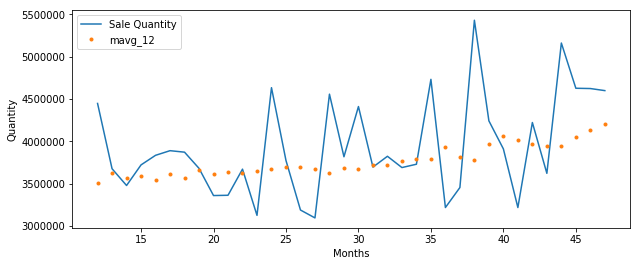

In [10]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb['Sale Quantity'][12:] );
plt.plot( wsb['mavg_12'][12:], '.' );
plt.legend();

In [11]:
import numpy as np
def get_mape(actual, predicted):
    
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )

In [12]:
get_mape( wsb['Sale Quantity'][36:].values,wsb['mavg_12'][36:].values)

14.04

In [13]:
wsb['Sale Quantity'][36:].values

array([3216483, 3453239, 5431651, 4241851, 3909887, 3216438, 4222005,
       3621034, 5162201, 4627177, 4623945, 4599368])

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error( wsb['Sale Quantity'][36:].values,wsb['mavg_12'][36:].values)

539822053974.18866

**Exponential Smoothing**

In [15]:
wsb['ewm'] = wsb['Sale Quantity'].ewm( alpha = 0.2 ).mean()

In [16]:
pd.options.display.float_format = '{:.2f}'.format

In [17]:
wsb[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,mavg_11,ewm
36,37,3216483,121,1,3928410.33,3810280.00,3828234.64
37,38,3453239,128,0,3810280.00,3783643.33,3753219.93
38,39,5431651,170,0,3783643.33,3970688.42,4088961.93
39,40,4241851,160,0,3970688.42,4066369.08,4119543.81
40,41,3909887,151,1,4066369.08,4012412.75,4077607.99
41,42,3216438,120,1,4012412.75,3962369.58,3905359.34
42,43,4222005,152,0,3962369.58,3946629.42,3968692.78
43,44,3621034,125,0,3946629.42,3940489.50,3899157.24
44,45,5162201,170,0,3940489.50,4052117.17,4151776.99
45,46,4627177,160,0,4052117.17,4130274.75,4246860.31


In [18]:
get_mape( wsb[['Sale Quantity']][36:].values,wsb[['ewm']][36:].values)

11.15

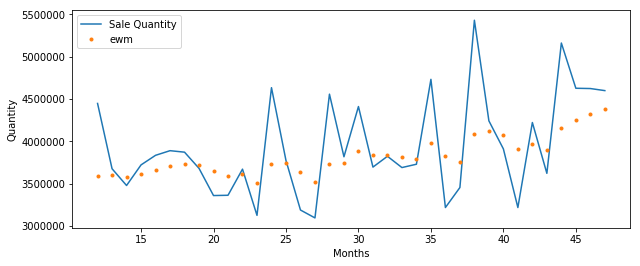

In [19]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb['Sale Quantity'][12:] );
plt.plot( wsb['ewm'][12:], '.' );
plt.legend();

**Decomposing Time Series**

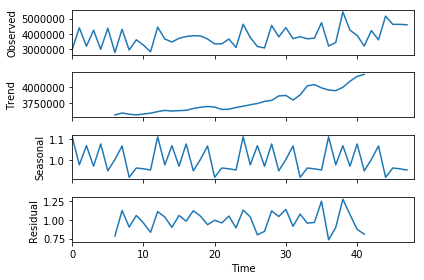

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompse = seasonal_decompose( np.array(wsb['Sale Quantity']),model='multiplicative',freq = 12 )

## Plotting the deocompsed time series components
ts_plot = ts_decompse.plot()

In [21]:
wsb['seasonal'] = ts_decompse.seasonal
wsb['trend'] = ts_decompse.trend

**ARIMA**

In [22]:
store_df = pd.read_excel('/kaggle/input/storeee/store.xls')

In [23]:
store_df.head(5)

,Date,demand
0,2014-10-01,15
1,2014-10-02,7
2,2014-10-03,8
3,2014-10-04,10
4,2014-10-05,13


In [24]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
Date      115 non-null datetime64[ns]
demand    115 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [25]:
store_df.set_index( pd.to_datetime(store_df.Date), inplace= True)
store_df.drop('Date', axis = 1, inplace = True)
store_df[-5:]

,demand
Date,
2015-01-19,18
2015-01-20,22
2015-01-21,22
2015-01-22,21
2015-01-23,17


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


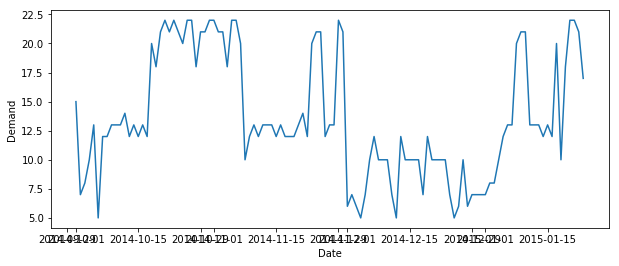

In [26]:
plt.figure( figsize=(10,4))
plt.xlabel( "Date" )
plt.ylabel( "Demand" )
plt.plot( store_df.demand );

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

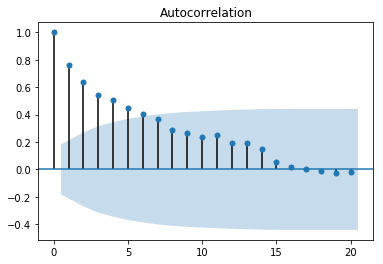

In [28]:
acf_plot = plot_acf( store_df.demand,lags=20 )

**Dicky-Fuller Test**

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
def adfuller_test( ts ):
    adfuller_result = adfuller( ts, autolag=None )
    adfuller_out = pd.Series(adfuller_result[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    print( adfuller_out )

In [31]:
adfuller_test( store_df.demand )

Test Statistic                 -1.65
p-value                         0.46
Lags Used                      13.00
Number of Observations Used   101.00
dtype: float64


**Differencing**

In [32]:
store_df['demand_diff'] = store_df.demand - store_df.demand.shift(1)

In [33]:
store_df.head(5)

,demand,demand_diff
Date,,
2014-10-01,15,nan
2014-10-02,7,-8.00
2014-10-03,8,1.00
2014-10-04,10,2.00
2014-10-05,13,3.00


In [34]:
store_df.shape

(115, 2)

In [35]:
adfuller_test( store_df.demand_diff.dropna() )

Test Statistic                 -2.56
p-value                         0.10
Lags Used                      13.00
Number of Observations Used   100.00
dtype: float64


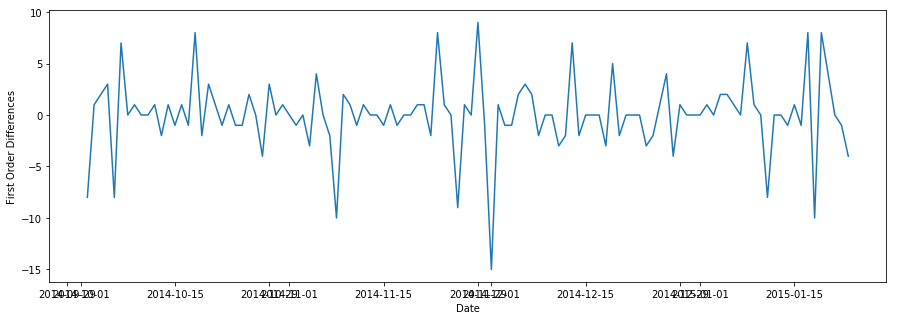

In [36]:
plt.figure( figsize=(15,5))
plt.xlabel( "Date" )
plt.ylabel( "First Order Differences" )
plt.plot( store_df.demand_diff );

In [37]:
store_df['demand_diff2'] = store_df.demand_diff - store_df.demand_diff.shift(1)

In [38]:
store_df.head()

,demand,demand_diff,demand_diff2
Date,,,
2014-10-01,15,nan,nan
2014-10-02,7,-8.00,nan
2014-10-03,8,1.00,9.00
2014-10-04,10,2.00,1.00
2014-10-05,13,3.00,1.00


In [39]:
adfuller_test( store_df.demand_diff2.dropna() )

Test Statistic                -4.64
p-value                        0.00
Lags Used                     13.00
Number of Observations Used   99.00
dtype: float64


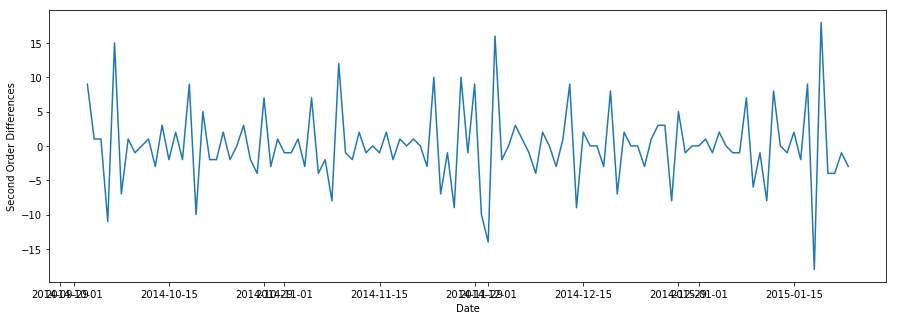

In [40]:
plt.figure( figsize=(15,5))
plt.xlabel( "Date" )
plt.ylabel( "Second Order Differences" )
plt.plot( store_df.demand_diff2 );

In [41]:
store_diff_df = store_df.dropna()

In [42]:
store_diff_df.shape

(113, 3)

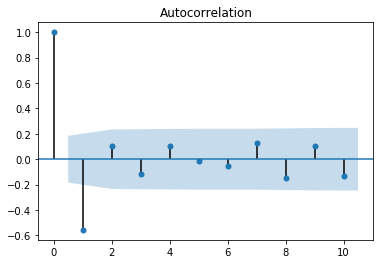

In [43]:
Acf_plot = plot_acf( store_diff_df.demand_diff2,lags=10 )

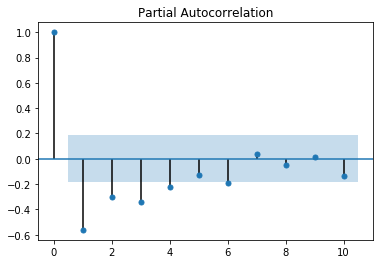

In [44]:
Pacf_plot = plot_pacf( store_diff_df.demand_diff2,lags=10 )

In [45]:
store_train = store_df[0:100]
store_test = store_df[100:]

In [46]:
store_test.shape

(15, 3)

In [47]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [48]:
arima = ARIMA( store_train.demand.astype(np.float64).as_matrix(),order = (1,1,1))
arima_model = arima.fit()
#arima_model.summary2()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [49]:
sm.stats.acorr_ljungbox(arima_model.resid)

(array([ 0.06389768,  0.12049325,  0.73575603,  1.79701805,  1.81251738,
         2.33404728,  2.55021796,  3.36633882,  3.377809  ,  3.92211401,
         4.19273646,  7.3817705 ,  7.6480985 ,  8.2218774 , 10.21388069,
        10.60139687, 11.17929181, 11.26168219, 12.19637937, 13.82351338,
        21.80262275, 23.12145147, 25.52488954, 27.13691743, 27.26025347,
        27.28988057, 27.29925507, 27.56870369, 27.84996037, 28.12652304,
        28.48482384, 29.10763262, 30.47514013, 30.65586212, 35.15892776,
        35.21547144, 36.08199745, 36.47255126, 37.73385144, 40.55784669]),
 array([0.8004383 , 0.9415323 , 0.86476326, 0.77302787, 0.87443065,
        0.88655852, 0.92326837, 0.90931195, 0.9474174 , 0.95079215,
        0.9639359 , 0.83138842, 0.86574655, 0.87744923, 0.80607485,
        0.8333954 , 0.8470931 , 0.8829238 , 0.87706046, 0.83933025,
        0.41095952, 0.39489895, 0.32380206, 0.29811156, 0.34300946,
        0.39425703, 0.44774169, 0.4874689 , 0.52594584, 0.563732  ,
      

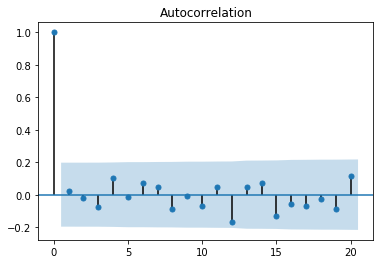

In [50]:
acf_plot = plot_acf(arima_model.resid,lags = 20)

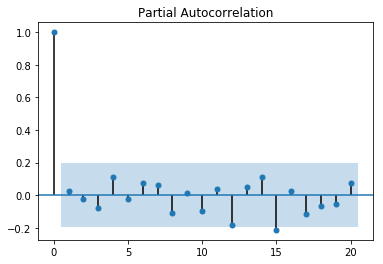

In [51]:
pacf_plot = plot_pacf(arima_model.resid,lags = 20)

**Forecast and measure accuracy**

In [52]:
store_predict, stderr, ci = arima_model.forecast(steps = 15)

In [53]:
store_predict

array([17.32364972, 16.2587005 , 15.84771265, 15.70212457, 15.66424475,
       15.6700766 , 15.69364814, 15.72441904, 15.75811169, 15.79299009,
       15.8283497 , 15.86390461, 15.89953877, 15.9352051 , 15.97088448])

In [54]:
get_mape( store_df.demand[100:],store_predict )

24.17

In [55]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 6.6MB/s 


In [56]:
from pmdarima import auto_arima

In [57]:
model = auto_arima(store_train.demand,  trace=True, error_action="ignore", suppress_warnings=True)
model.fit(store_train.demand)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=525.636, BIC=541.207, Fit time=0.267 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=527.457, BIC=532.647, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=525.439, BIC=533.225, Fit time=0.050 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=522.793, BIC=530.578, Fit time=0.045 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=525.479, BIC=528.074, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=521.771, BIC=532.151, Fit time=0.060 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=523.418, BIC=536.393, Fit time=0.072 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=523.567, BIC=536.542, Fit time=0.120 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=521.892, BIC=532.272, Fit time=0.071 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 1);

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 1),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [58]:
forecast = model.predict(n_periods=len(store_test))

In [59]:
store_test["Forecast_ARIMA"] = forecast

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


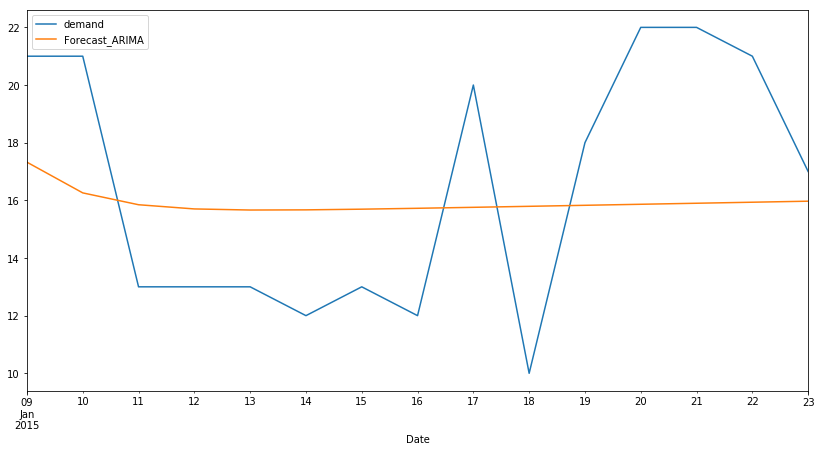

In [60]:
store_test[["demand", "Forecast_ARIMA"]].plot(figsize=(14, 7))

In [61]:
get_mape( store_df.demand[100:],forecast )

24.17

In [62]:
from fbprophet import Prophet

In [63]:
df = pd.read_excel('/kaggle/input/storeee/store.xls')

In [64]:
df.shape

(115, 2)

In [65]:
df.columns=['ds','y']


In [66]:
df_train = df[:100]
df_test = df[100:]

In [67]:
m=Prophet()

In [68]:
m.fit(df_train)

In [69]:
forecast = m.predict(df_test)

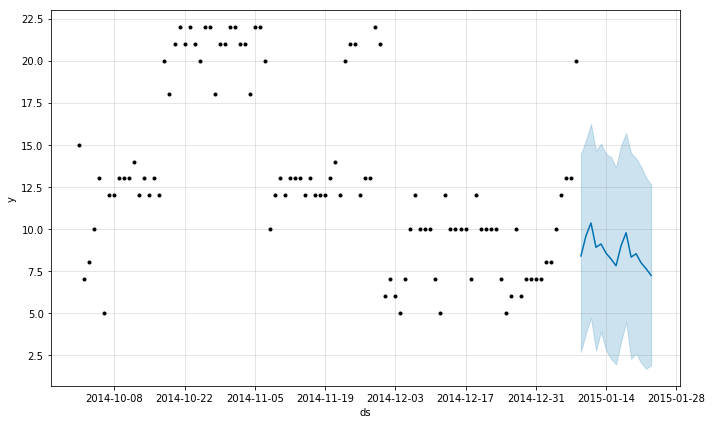

In [70]:
fig1 = m.plot(forecast)

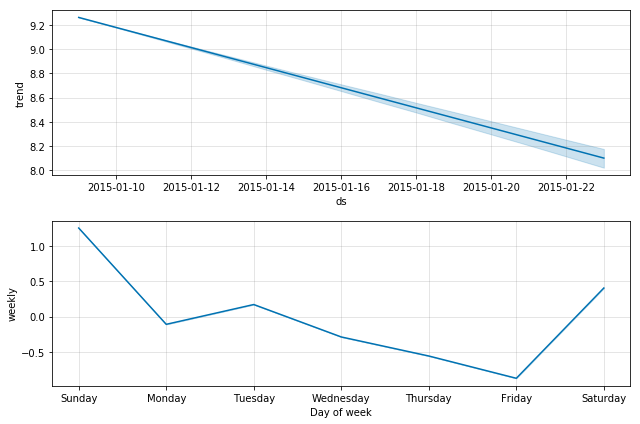

In [71]:
fig2 = m.plot_components(forecast)

In [72]:
df_test["Forecast_Prophet"] = forecast.yhat.values

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



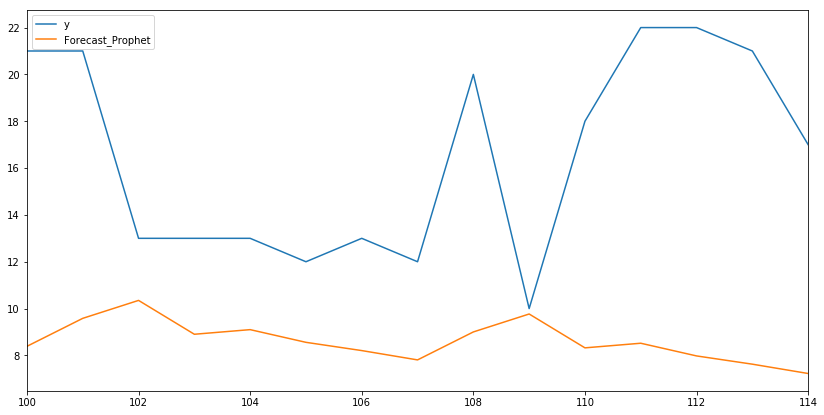

In [73]:
df_test[["y", "Forecast_Prophet"]].plot(figsize=(14, 7))

In [74]:
get_mape( store_df.demand[100:],forecast.yhat.values )

43.6